# GeoPandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

## Import Data

In [2]:
df = pd.read_csv('data/training_set_values.csv', index_col='id')
df_target = pd.read_csv('data/training_set_labels.csv', index_col='id')
df = df.join(df_target)
df['binary_status'] = df['status_group'].replace(
    {'non functional':'needs repair', 'functional needs repair':
     'needs repair'}
)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

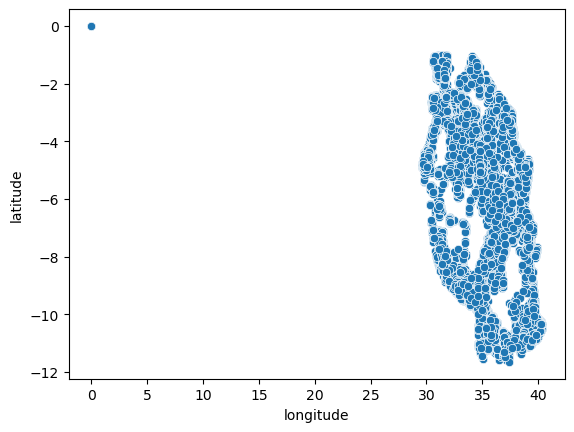

In [3]:
fig0, ax0 = plt.subplots()

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax0)

The latitudinal and longitudinal values do not make sense for this value, we'll have to convert to NaN and let the numeric imputer handle it.

In [4]:
#changing longitudinal values < 20 to np.NaN
df['longitude'].mask(df['longitude'] < 20 , np.NaN, inplace=True)
#changing latitudinal values > .5 to np.NaN
df['latitude'].mask(df['latitude'] > .5 , np.NaN, inplace=True)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

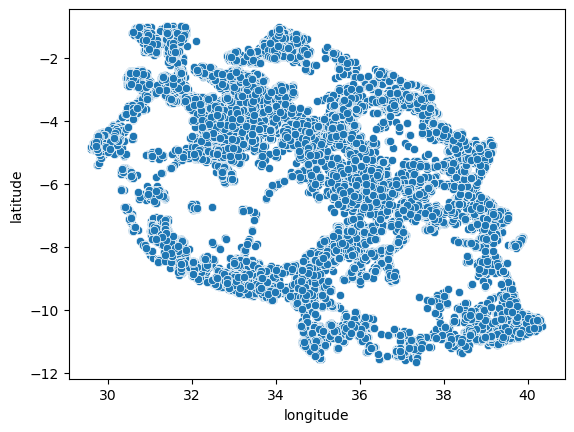

In [5]:
fig1, ax1 = plt.subplots()

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax1)

## Mapping

In [6]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [96]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
#isolate tanzania
tanzania = countries.loc[countries['name'] == 'Tanzania']

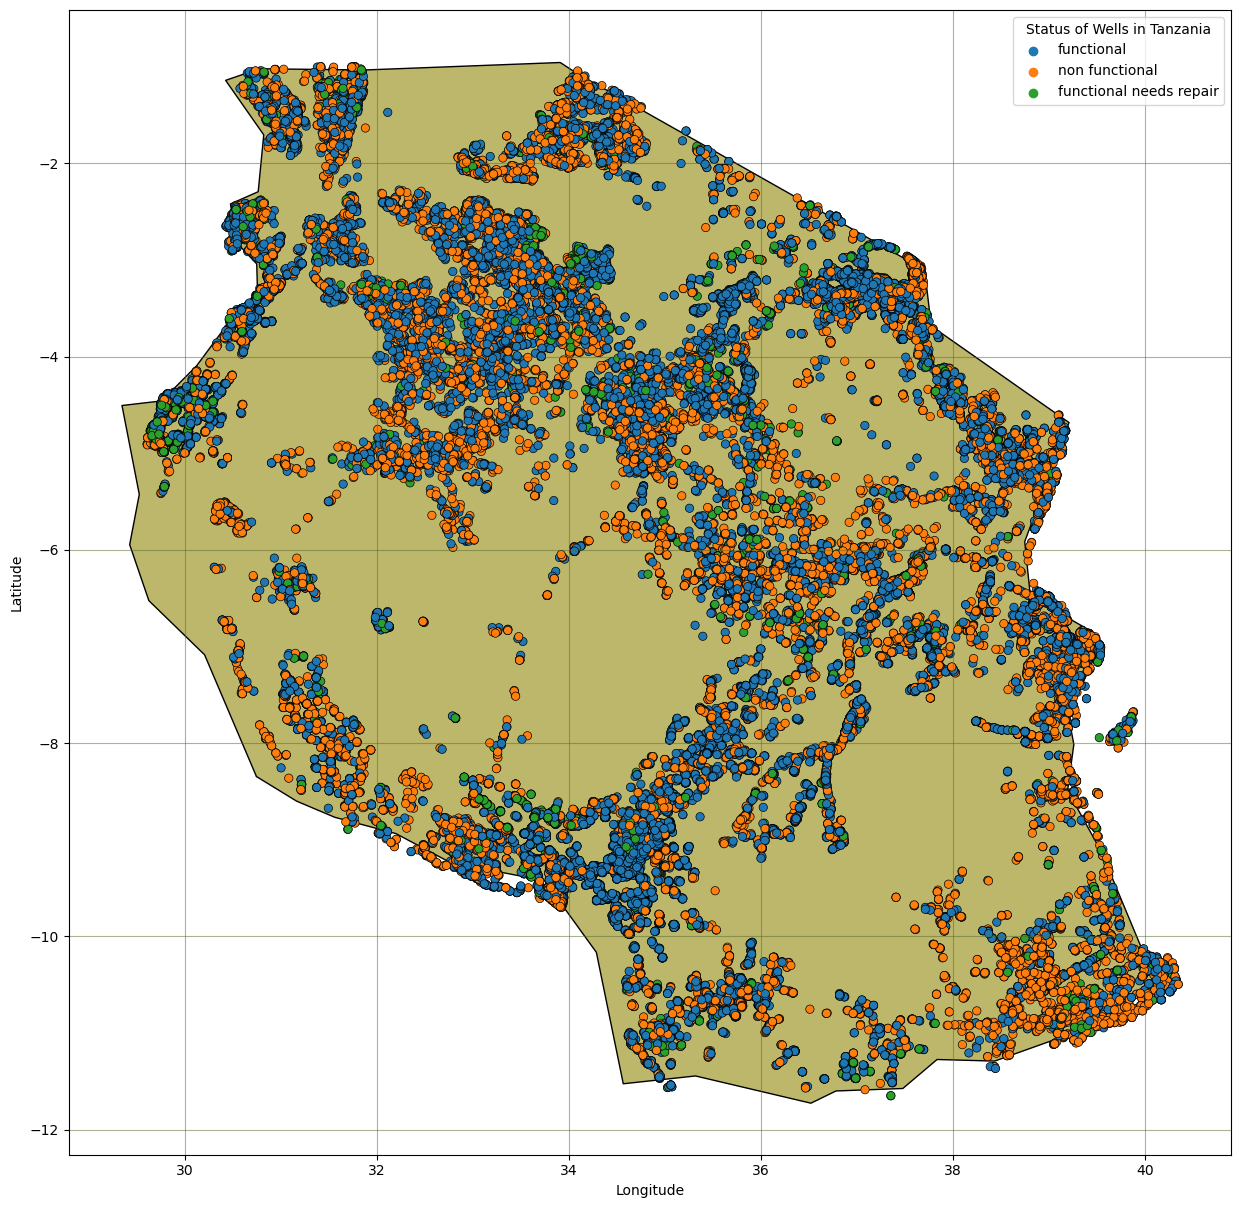

In [103]:
fig2, ax2 = plt.subplots(figsize=(15, 15))

tanzania.plot(color='darkkhaki',
              edgecolor='black',
              ax=ax2
              )

sns.scatterplot(data=df,
                x='longitude',
                y='latitude',
                hue='status_group',
                palette='tab10',
                edgecolor='black',
                alpha=1,
                ax=ax2)

ax2.grid(visible=True, color='darkolivegreen', alpha=.5)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.legend(title='Status of Wells in Tanzania')

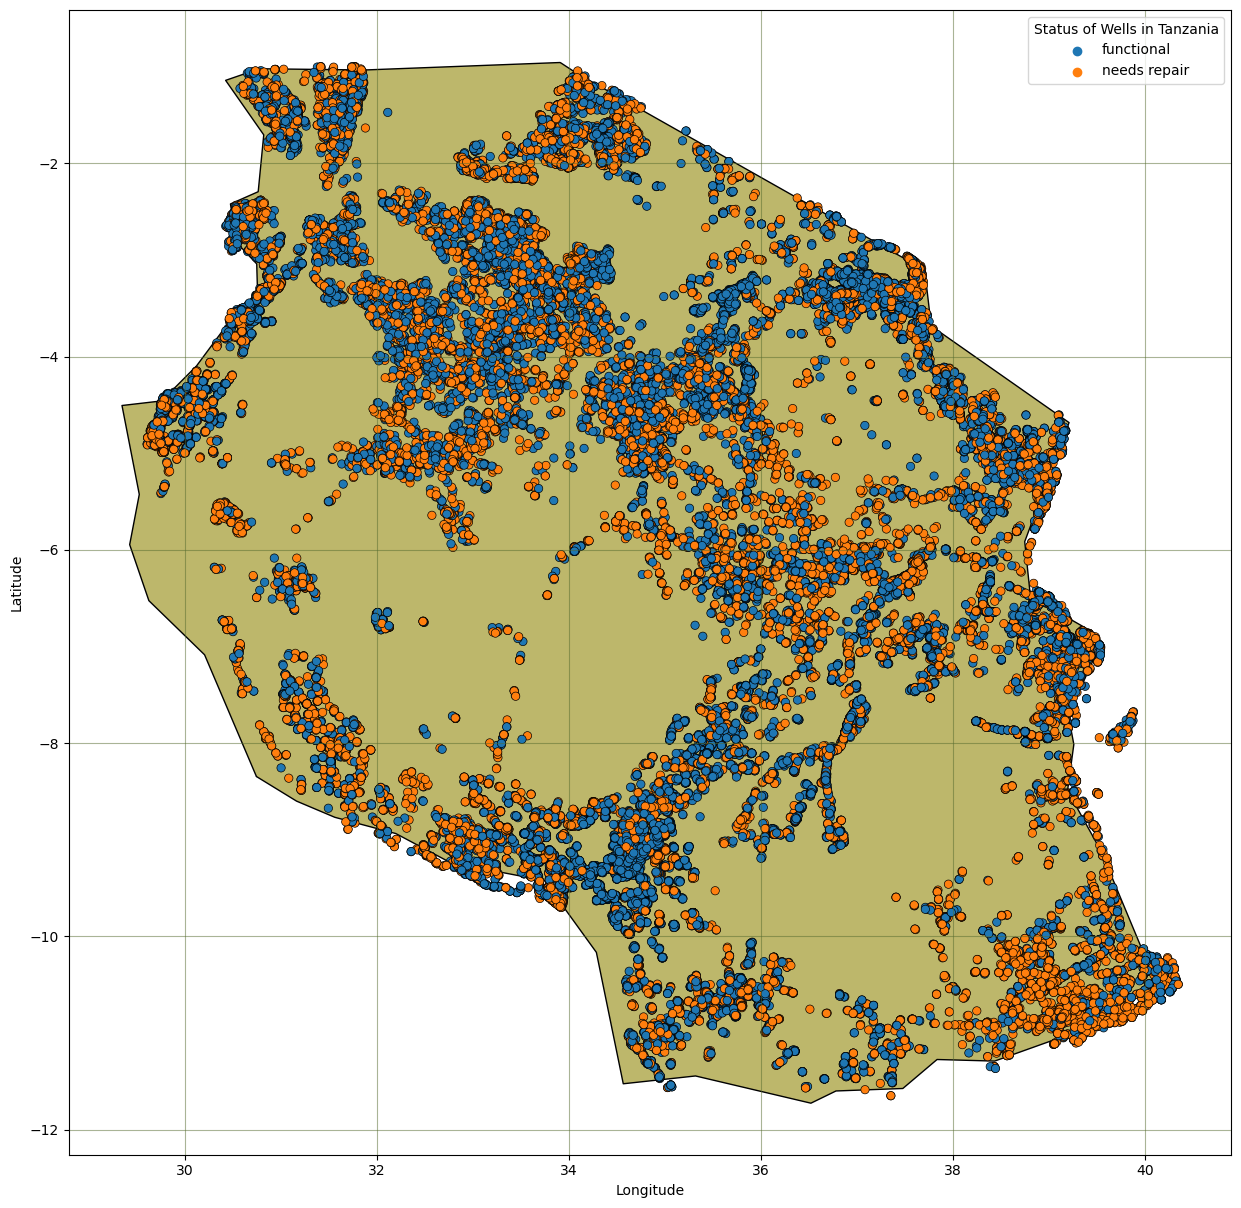

In [117]:
fig2, ax2 = plt.subplots(figsize=(15, 15))

tanzania.plot(color='darkkhaki',
              edgecolor='black',
              ax=ax2)

sns.scatterplot(data=df,
                x='longitude',
                y='latitude',
                hue='binary_status',
                palette='tab10',
                edgecolor='black',
                alpha=1,
                ax=ax2)

ax2.grid(visible=True, color='darkolivegreen', alpha=.5)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.legend(title='Status of Wells in Tanzania')

In [97]:
africa = countries.loc[countries['continent'] == 'Africa']

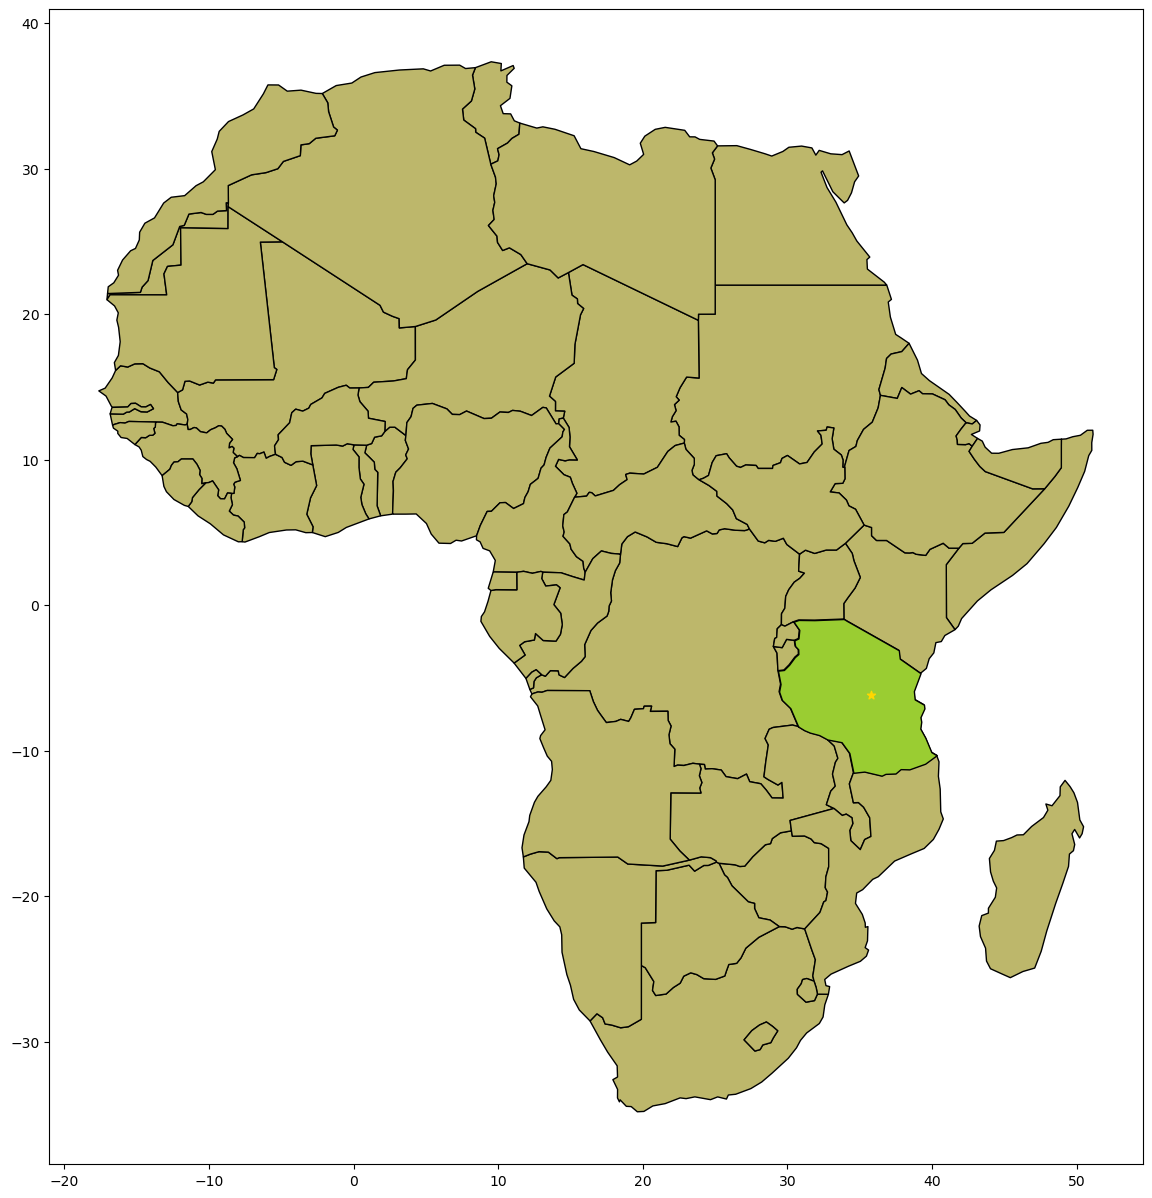

In [118]:
fig2, ax2 = plt.subplots(figsize=(15, 15))

africa.plot(color='darkkhaki',
              edgecolor='black',
              ax=ax2)

tanzania.plot(color='yellowgreen',
              edgecolor='black',
              ax=ax2)
#Dodoma (Capital) Coordinates: 6.1630° S, 35.7516° E
plt.scatter(x=35.7516, 
            y=-6.1630, 
            marker='*', 
            color='gold',
           )